# Logistic Regression

### Load the dataset

In [1]:
import pandas as pd 
df = pd.read_csv('data.csv')
df.head(10)

,Age,Gender,PlanType,MonthlyUsage,Churn
0,21,Female,Regular,15,No
1,45,Female,Economy,41,No
2,44,Female,Economy,40,No
3,31,Female,Regular,23,Yes
4,33,Female,Regular,12,No
5,42,Female,Regular,52,No
6,20,Female,Ultra,57,Yes
7,26,Male,Ultra,23,No
8,37,Female,Advanced,31,No
9,26,Male,Economy,23,No


### Inspect the dataset

In [2]:
# Inspect columns and basic info
print('Columns:', df.columns.tolist())

#1.Dataset Basic Info
print('\nDataset Info:')
df.info()

#2. Completeness: Check for missing values:
#Checks if any column has missing/null values.
print('\nDataset Completeness:')
df.isnull().sum()

#3.Dataset Consistency: All numeric columns should be numeric
print('\nDataset Consistency:')
df.dtypes       # Checks datatype consistency


Columns: ['Age', 'Gender', 'PlanType', 'MonthlyUsage', 'Churn']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           150 non-null    int64 
 1   Gender        150 non-null    object
 2   PlanType      150 non-null    object
 3   MonthlyUsage  150 non-null    int64 
 4   Churn         150 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.0+ KB

Dataset Completeness:

Dataset Consistency:


Age              int64
Gender          object
PlanType        object
MonthlyUsage     int64
Churn           object
dtype: object

In [3]:
#4. Accuracy: Values realistic or outlier
print('\nDataset Describe:')
df.describe()  # Summary stats

#5. Time-Keeping is the data up-to-date ?
print('\nDataset Time-Keeping:')
print('\nNo timestamps')

#6. BIAS check is data skewed toward 1 user group ?
print('\nDataset Bias')
df['Gender'].value_counts(normalize = True)
df['Churn'].value_counts(normalize = True)


Dataset Describe:

Dataset Time-Keeping:

No timestamps

Dataset Bias


Churn
No     0.893333
Yes    0.106667
Name: proportion, dtype: float64

<Axes: >

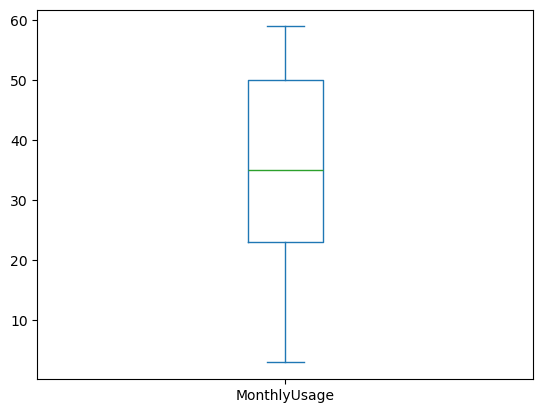

In [4]:
df['MonthlyUsage'].plot(kind = 'box')

## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `telecom_data.csv` (demo dataset) |
| **Description**     | Contains customer behavior data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `Age`, `Gender`, `Plantype`, `MonthlyUsage` |
| **Target Variable** | *Churn*(Yes=churned) |
| **Number of Rows**  | 150 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | One Hot encoding applied to `categorical data`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `plantype` |
| **Owner**           | Vedashree |
| **Last Updated**    | 2026-02-10 |

### Separate Features and Labels

In [5]:
# Separate features and targets 
# Drop the targets column 'Churn' from the main dataframe
fdata = df.drop(columns = ['Churn'])
x = fdata

In [6]:
# Create a separate target variable (y)
# Encode target variable to numeric (Yes = 1, No = 0)
y = df["Churn"].map({'Yes':1, 'No':0})

# Identify Categorical and Numerical Features
categorical = fdata.select_dtypes(include = 'object').columns
numerical = fdata.select_dtypes(exclude = 'object').columns

# Display Feature Types
print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

Categorical Features: ['Gender', 'PlanType']
Numerical Features: ['Age', 'MonthlyUsage']


### Preprocessing

In [7]:
# Convert text into numbers:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Feature Encoding 

# Using pd.getdummies()
x_encoded_gd = pd.get_dummies(
    x,
    columns = categorical,
    drop_first = True
) # Encoding directly with pandas
print("gd Encoded Columns: ",x_encoded_gd.columns.tolist())

gd Encoded Columns:  ['Age', 'MonthlyUsage', 'Gender_Male', 'PlanType_Economy', 'PlanType_Regular', 'PlanType_Standard', 'PlanType_Ultra']


In [8]:
print(x_encoded_gd.Gender_Male)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Gender_Male, Length: 150, dtype: bool


In [9]:
print(x_encoded_gd.PlanType_Economy)

0      False
1       True
2       True
3      False
4      False
       ...  
145    False
146    False
147    False
148     True
149    False
Name: PlanType_Economy, Length: 150, dtype: bool


In [10]:
# Using OneHotEncoder()
ohe = OneHotEncoder(
    drop = 'first',
    sparse_output = False
)
encoded_array = ohe.fit_transform(x[categorical])
print(encoded_array)

# Convert back to Dataframe
encoded_df = pd.DataFrame(
    encoded_array, 
    columns = ohe.get_feature_names_out(categorical))
print(encoded_df)

# Merge encoded columns with numeric ones
x_encoded_ohe = pd.concat(
    [x[numerical].reset_index(drop = True), encoded_df.reset_index(drop = True)],
    axis = 1 
)
print("OHE Encoded Columns :",x_encoded_ohe.columns.tolist())

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0.

In [11]:
# Using StandardScaler()
scaler = StandardScaler()
x_scaled_gd = x_encoded_gd.copy()
x_scaled_gd[numerical] = scaler.fit_transform(x_scaled_gd[numerical]) # Standardize only numeric columns

# Feature Scaling 
x_scaled_ohe = x_encoded_ohe.copy()
x_scaled_ohe[numerical] = scaler.fit_transform(x_scaled_ohe[numerical]) # Scale numeric columns, standard scaler works

df = pd.DataFrame({
    'Age_ohe': x_scaled_ohe[numerical]['Age'],
    'Age_gd': x_scaled_gd[numerical]['Age'],
    'MonthlyUsage_ohe':x_scaled_ohe[numerical]['MonthlyUsage'],
    'MonthlyUsage_gd':x_scaled_gd[numerical]['MonthlyUsage'],
})

print("Comparison_Table: \n", df)

Comparison_Table: 
       Age_ohe    Age_gd  MonthlyUsage_ohe  MonthlyUsage_gd
0   -1.313545 -1.313545         -1.177914        -1.177914
1    0.907574  0.907574          0.460411         0.460411
2    0.815027  0.815027          0.397399         0.397399
3   -0.388079 -0.388079         -0.673814        -0.673814
4   -0.202986 -0.202986         -1.366951        -1.366951
..        ...       ...               ...              ...
145 -1.498638 -1.498638         -1.934064        -1.934064
146  0.629934  0.629934          1.153549         1.153549
147  1.740493  1.740493         -1.682014        -1.682014
148 -1.406091 -1.406091          1.468612         1.468612
149 -0.388079 -0.388079         -0.673814        -0.673814

[150 rows x 4 columns]


### Train-Test split 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled_ohe,
    y,
    test_size = 0.20,
    random_state = 42, 
    stratify = y 
)
pd.DataFrame({
    "Train": y_train.value_counts(normalize = True),
    "Test": y_test.value_counts(normalize = True),
})

,Train,Test
Churn,,
0,0.891667,0.9
1,0.108333,0.1


### Train the Logistic Regression model

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression with default settings
model = LogisticRegression(max_iter = 1000)

# Train the model on the training set
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Logistic Regression model accuracy: 93.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.33      0.50         3

    accuracy                           0.93        30
   macro avg       0.97      0.67      0.73        30
weighted avg       0.94      0.93      0.92        30



In [15]:
print(x_scaled_ohe.head(5))

        Age  MonthlyUsage  Gender_Male  PlanType_Economy  PlanType_Regular  \
0 -1.313545     -1.177914          0.0               0.0               1.0   
1  0.907574      0.460411          0.0               1.0               0.0   
2  0.815027      0.397399          0.0               1.0               0.0   
3 -0.388079     -0.673814          0.0               0.0               1.0   
4 -0.202986     -1.366951          0.0               0.0               1.0   

   PlanType_Standard  PlanType_Ultra  
0                0.0             0.0  
1                0.0             0.0  
2                0.0             0.0  
3                0.0             0.0  
4                0.0             0.0  


## Predicting User Input

In [16]:
new_customer = pd.DataFrame({
    "Age": [-0.984632],
    "MonthlyUsage" : [1.976541],
    "Gender_Male" : [1.0],
    "PlanType_Economy" : [0.0],
    "PlanType_Regular" : [0.0],
    "PlanType_Standard" : [0.0],
    "PlanType_Ultra" : [1.0],
})
print("Prediction ",model.predict(new_customer))

Prediction  [1]
